In [1]:
import json
import matplotlib.pyplot as plt

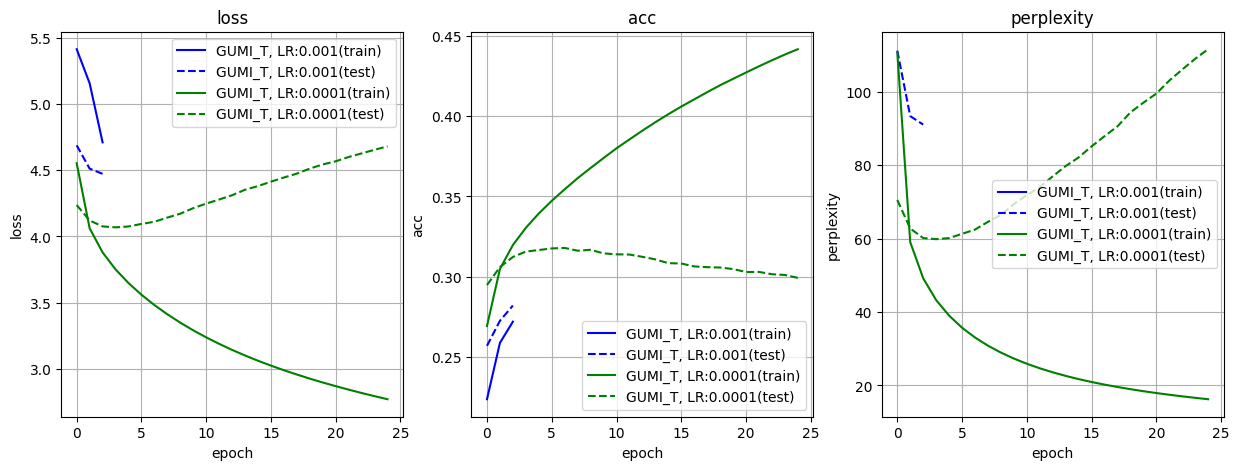

In [11]:
# 項目名: 学習履歴
history_dict = {
    "GUMI_T, LR:0.001": "/home/user/workspace/GUMI_T_Paper/results/GUMI_T1/True_True_0.75_True_31_4_16_0.001_32_25_1024/train_history.json",
    "GUMI_T, LR:0.0001": "/home/user/workspace/GUMI_T_Paper/results/GUMI_T1/True_True_0.75_True_31_4_16_0.0001_32_25_1024/train_history.json"
}

def draw_result(history_dict, targets, is_test = True):
    """
        targets: 描画する項目名
        is_test: 検証データに対する損失，精度を描く場合True
    """
    colors = [
        'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white',
        'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal', 'navy'
    ]

    result_dict = dict()
    for K, V in history_dict.items():
        with open(V, "r") as f:
            result = json.load(f)
        result_dict[K] = result

    fig = plt.figure(figsize = (5 * len(targets), 5))
    
    for i, target in enumerate(targets):
        ax = fig.add_subplot(1, len(targets), i + 1)
        for C, (K, V) in zip(colors, result_dict.items()):
            ax.plot(V[f"train_{target}_history"], color = C, linestyle = "-", label = f"{K}(train)")
            if is_test:
                ax.plot(V[f"test_{target}_history"], color = C, linestyle = "--", label = f"{K}(test)")
        ax.legend()
        ax.grid()
        ax.set_xlabel("epoch")
        ax.set_ylabel(target)
        ax.set_title(target)

draw_result(history_dict, targets = ["loss", "acc", "perplexity"], is_test = True)